In [90]:
import numpy as np
import matplotlib.pyplot as plt
import astropy
from astropy.constants import c as clight
from astropy.constants import e as e_elec
from astropy.constants import h as hplanck
from astropy.cosmology import WMAP9 as cosmo
import glob

$$\tau_{\rm eff, LL} (r,\nu) = \int_0^r \kappa_{\rm LL} (r',\nu) d r'$$

In [112]:
clight_kmps=clight.to("km/s").value

In [113]:
clight_kmps

299792.458

In [3]:
def drdz(z):
    return clight/cosmo.H(z)/(1+z)

def drdz_matter_dom(z):
    return clight/cosmo.H0/cosmo.Om0**0.5*(1+z)**(-2.5)

In [4]:
#(hplanck*clight/astropy.units.quantity.Quantity(1,"eV")).to("AA")
eV2lambdaAA=lambda eV:12398.42/eV
lambdaAA2eV=lambda AA:12398.42/AA

In [5]:
def sigma_HI_nu(nu):
    nuHI=13.6
    sigma_HI=6.30e-18*(1.34*(nu/nuHI)**-2.99-0.34*(nu/nuHI)**-3.99) #cm**2
    sigma_HI[nu<nuHI]=0
    return sigma_HI

Text(0, 0.5, 'cm^2')

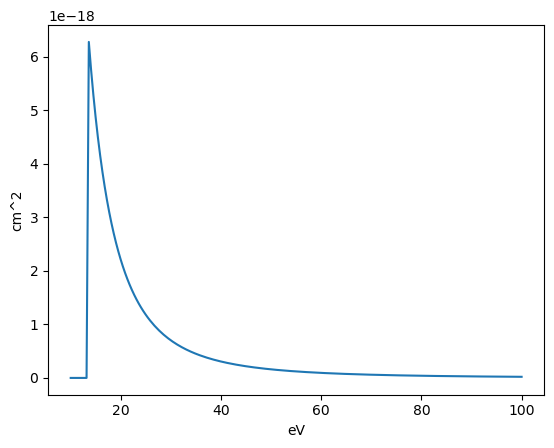

In [6]:
test_eV_array=np.linspace(10.,100,200)
test_AA_array=eV2lambdaAA(test_eV_array)
plt.plot(test_eV_array,sigma_HI_nu(test_eV_array))
plt.xlabel("eV")
plt.ylabel("cm^2")

$$ d \tau = n \sigma dr $$

In [7]:
eV2lambdaAA(13.6)

911.6485294117647

In [9]:
clight

<<class 'astropy.constants.codata2018.CODATA2018'> name='Speed of light in vacuum' value=299792458.0 uncertainty=0.0 unit='m / s' reference='CODATA 2018'>

In [62]:
def calc_tau(nHI,dr_pMpc,eVarray):
    dr=dr_pMpc*3.08e24 #cm
    return nHI*dr*sigma_HI_nu(eVarray) #

In [63]:
def tau_profile(vspec_out,nHI,dr_pMpc):
    lambdaAA_out=eV2lambdaAA(13.6)*(1-vspec_out/2.9979246e5)
    eV_out=lambdaAA2eV(lambdaAA_out)
    return calc_tau(nHI,dr_pMpc,eV_out)

In [64]:
def tau_per_denpixel(vspec_out,pos_pMpc,nHI,vlos,dr_pMpc,Hz):
    vel_space_pos=pos_pMpc*Hz-vlos
    v_relative=vspec_out-vel_space_pos
    lambdaAA_out=eV2lambdaAA(13.6)*(1-v_relative/2.9979246e5)
    eV_out=lambdaAA2eV(lambdaAA_out)
    return calc_tau(nHI,dr_pMpc,eV_out)

In [65]:
# observers usually use range 820~912 AA
(912-820)/912*clight.to("km/s")

<Quantity 30242.22164035 km / s>

### a fake uniform sightline as a test

In [66]:
dr_pMpc=0.01
Ncell=500
print("total integration length= {:f} pMpc".format(dr_pMpc*Ncell))
dr_pMpc_array=np.ones(Ncell)*dr_pMpc
pos_arr_pMpc=np.cumsum(dr_pMpc_array)
nHI_arr=np.ones(Ncell)*1e-8
vlos_arr=np.zeros(Ncell)

total integration length= 5.000000 pMpc


In [67]:
def integ_tau(vspec_out,pos_arr_pMpc,nHI,vlos,dr_pMpc,Hz):
    tau_matrix=np.array([tau_per_denpixel(vspec_out,pos_arr_pMpc[i],\
                       nHI[i],vlos[i],dr_pMpc[i],Hz) for i in range(len(pos_arr_pMpc))])
    return np.sum(tau_matrix,axis=0)

In [68]:
vout=np.linspace(0,30000,100)
AAout=eV2lambdaAA(13.6)*(1-vout/2.9979246e5)

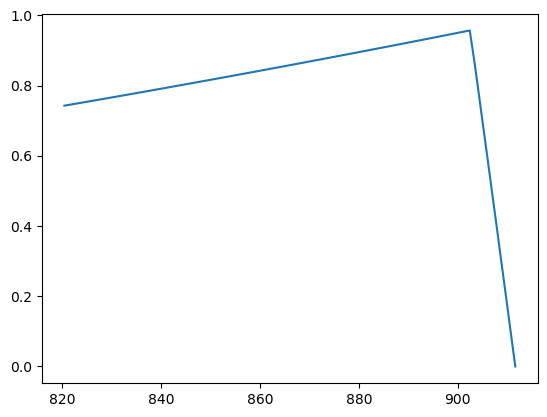

In [69]:
plt.plot(AAout,integ_tau(vout,pos_arr_pMpc,nHI_arr,vlos_arr,dr_pMpc_array,600))


Text(0, 0.5, 'transmitted flux')

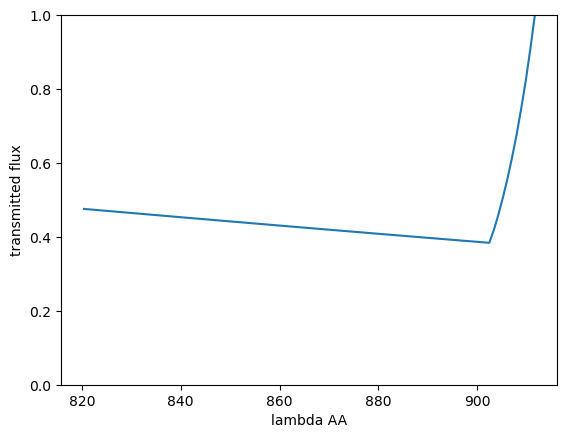

In [70]:
plt.plot(AAout,np.exp(-integ_tau(vout,pos_arr_pMpc,nHI_arr,vlos_arr,dr_pMpc_array,600)))
plt.ylim(0,1)
plt.xlabel("lambda AA")
plt.ylabel("transmitted flux")

In [45]:
import yt

/home/hqchen/software/anaconda3/envs/tf_env/lib/python3.9/_collections_abc.py:769: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [168]:
rootpath="/data/hqchen/neutral_patches/"
folder="F_a0.1287_50pMpc/"
zuni=1/0.1287-1
Hz=cosmo.H(zuni).value
print(zuni)

6.770007770007769


In [169]:
losList

['/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n0.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n1.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n2.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n3.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n4.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n5.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n6.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n7.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n8.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n9.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n10.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n11.h5',
 '/data/hqchen/neutral_patches/F_a0.1355_50pMpc/lightray_h5453204_n12.h5',
 '/data/hqchen/neutral_patches/F_a0

In [170]:
tau_profiles=[]
losList=glob.glob(rootpath+folder+"lightray*h5")
for losName in losList[:]:
    los=yt.load(losName)
    dr=los.r["dl"].to("Mpc").value
    dist=np.cumsum(los.r["dl"].to("Mpc").value)
    nHI=(los.r['gas','RT_HVAR_HI']/yt.units.mp).in_units("cm**-3").v
    vlos=los.r['gas','velocity_los'].to("km/s").v
    cut_inner=0.15
    tau_profiles.append(integ_tau(vout,dist[dist>cut_inner],nHI[dist>cut_inner],vlos[dist>cut_inner],dr[dist>cut_inner],Hz))

yt : [INFO     ] 2023-10-13 11:39:24,336 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:39:24,337 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:39:24,337 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:39:24,338 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:39:24,339 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:39:24,339 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:39:24,340 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:39:24,340 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:39:24,340 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:39:24,341 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:39:29,112 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:39:29,113 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:39:29,113 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:39:29,114 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:39:29,114 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:39:29,115 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:39:29,115 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:39:29,115 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:39:29,121 Allocating for 7.061e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:39:29,129 Identified 4.729e+03 octs
yt : [INFO     ] 2023-10-13 11:39:2

yt : [INFO     ] 2023-10-13 11:39:33,070 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:39:33,071 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:39:33,071 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:39:33,071 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:39:33,072 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:39:33,072 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:39:33,077 Allocating for 7.470e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:39:33,084 Identified 5.105e+03 octs
yt : [INFO     ] 2023-10-13 11:39:33,609 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:39:33,610 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:39:33,610 Parameters: domain

yt : [INFO     ] 2023-10-13 11:39:37,283 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:39:37,284 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:39:37,284 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:39:37,284 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:39:37,291 Allocating for 8.137e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:39:37,299 Identified 5.281e+03 octs
yt : [INFO     ] 2023-10-13 11:39:38,061 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:39:38,061 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:39:38,062 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:39:38,062 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:39:42,672 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:39:42,673 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:39:42,681 Allocating for 7.107e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:39:42,688 Identified 4.889e+03 octs
yt : [INFO     ] 2023-10-13 11:39:43,404 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:39:43,405 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:39:43,405 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:39:43,406 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:39:43,407 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:39:43,407 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:39:43,408 Para

yt : [INFO     ] 2023-10-13 11:39:48,144 Allocating for 8.616e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:39:48,154 Identified 5.553e+03 octs
yt : [INFO     ] 2023-10-13 11:39:48,968 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:39:48,968 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:39:48,969 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:39:48,969 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:39:48,970 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:39:48,970 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:39:48,971 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:39:48,971 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:39:48,971

yt : [INFO     ] 2023-10-13 11:39:54,498 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:39:54,499 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:39:54,500 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:39:54,500 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:39:54,501 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:39:54,502 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:39:54,502 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:39:54,502 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:39:54,503 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:39:54,503 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:39:59,678 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:39:59,679 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:39:59,679 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:39:59,680 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:39:59,680 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:39:59,680 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:39:59,681 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:39:59,681 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:39:59,688 Allocating for 8.381e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:39:59,708 Identified 5.777e+03 octs
yt : [INFO     ] 2023-10-13 11:40:0

yt : [INFO     ] 2023-10-13 11:40:04,777 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:04,777 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:04,778 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:04,778 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:04,778 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:04,779 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:40:04,785 Allocating for 8.886e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:04,802 Identified 5.929e+03 octs
yt : [INFO     ] 2023-10-13 11:40:05,662 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:05,663 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:05,664 Parameters: domain

yt : [INFO     ] 2023-10-13 11:40:11,335 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:11,335 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:11,336 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:11,336 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:40:11,343 Allocating for 7.361e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:11,353 Identified 5.097e+03 octs
yt : [INFO     ] 2023-10-13 11:40:11,927 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:11,928 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:11,929 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:11,929 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:40:15,601 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:15,602 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:40:15,607 Allocating for 7.186e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:15,617 Identified 4.793e+03 octs
yt : [INFO     ] 2023-10-13 11:40:16,203 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:16,204 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:16,205 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:16,205 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:40:16,206 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:16,206 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:16,207 Para

yt : [INFO     ] 2023-10-13 11:40:20,233 Allocating for 7.474e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:20,241 Identified 5.257e+03 octs
yt : [INFO     ] 2023-10-13 11:40:21,015 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:21,016 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:21,016 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:21,017 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:40:21,018 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:21,018 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:21,018 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:21,019 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:21,019

yt : [INFO     ] 2023-10-13 11:40:26,336 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:26,337 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:26,337 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:26,338 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:40:26,339 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:26,339 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:26,340 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:26,340 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:26,341 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:26,341 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:40:31,963 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:31,964 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:40:31,964 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:31,965 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:31,965 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:31,966 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:31,966 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:31,967 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:40:31,973 Allocating for 7.170e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:31,980 Identified 4.649e+03 octs
yt : [INFO     ] 2023-10-13 11:40:3

yt : [INFO     ] 2023-10-13 11:40:38,431 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:38,431 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:38,432 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:38,432 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:38,433 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:38,433 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:40:38,439 Allocating for 8.976e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:38,449 Identified 6.369e+03 octs
yt : [INFO     ] 2023-10-13 11:40:39,292 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:39,293 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:39,293 Parameters: domain

yt : [INFO     ] 2023-10-13 11:40:43,834 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:43,834 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:43,835 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:43,835 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:40:43,841 Allocating for 7.410e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:43,850 Identified 4.985e+03 octs
yt : [INFO     ] 2023-10-13 11:40:44,596 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:44,597 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:44,598 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:44,598 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:40:49,115 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:40:49,115 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:40:49,121 Allocating for 5.651e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:49,128 Identified 3.953e+03 octs
yt : [INFO     ] 2023-10-13 11:40:49,767 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:49,768 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:49,769 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:49,769 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:40:49,770 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:49,771 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:49,771 Para

yt : [INFO     ] 2023-10-13 11:40:54,350 Allocating for 8.798e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:40:54,375 Identified 5.977e+03 octs
yt : [INFO     ] 2023-10-13 11:40:55,200 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:40:55,200 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:40:55,201 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:40:55,202 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:40:55,202 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:40:55,203 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:40:55,204 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:40:55,204 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:40:55,205

yt : [INFO     ] 2023-10-13 11:41:01,867 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:01,867 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:01,868 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:01,869 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:41:01,870 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:01,870 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:01,870 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:01,871 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:01,871 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:01,872 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:41:08,085 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:08,086 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:41:08,086 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:08,087 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:08,087 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:08,087 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:08,088 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:08,088 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:08,095 Allocating for 8.645e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:08,104 Identified 6.057e+03 octs
yt : [INFO     ] 2023-10-13 11:41:0

yt : [INFO     ] 2023-10-13 11:41:13,842 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:13,843 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:13,843 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:13,844 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:13,844 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:13,844 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:13,850 Allocating for 7.782e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:13,858 Identified 5.249e+03 octs
yt : [INFO     ] 2023-10-13 11:41:14,647 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:14,647 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:14,648 Parameters: domain

yt : [INFO     ] 2023-10-13 11:41:19,380 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:19,381 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:19,381 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:19,381 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:19,387 Allocating for 8.700e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:19,428 Identified 6.121e+03 octs
yt : [INFO     ] 2023-10-13 11:41:20,244 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:20,244 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:20,245 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:20,245 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:41:23,440 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:23,440 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:23,447 Allocating for 8.138e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:23,454 Identified 5.457e+03 octs
yt : [INFO     ] 2023-10-13 11:41:24,032 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:24,032 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:24,033 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:24,033 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:41:24,034 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:24,035 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:24,035 Para

yt : [INFO     ] 2023-10-13 11:41:28,629 Allocating for 8.367e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:28,638 Identified 5.561e+03 octs
yt : [INFO     ] 2023-10-13 11:41:29,211 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:29,212 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:29,212 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:29,213 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:41:29,213 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:29,213 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:29,214 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:29,214 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:29,214

yt : [INFO     ] 2023-10-13 11:41:33,400 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:33,401 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:33,401 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:33,402 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:41:33,402 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:33,403 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:33,403 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:33,403 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:33,404 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:33,404 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:41:37,384 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:37,385 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:41:37,385 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:37,386 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:37,386 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:37,386 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:37,387 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:37,387 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:37,392 Allocating for 7.170e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:37,400 Identified 4.809e+03 octs
yt : [INFO     ] 2023-10-13 11:41:3

yt : [INFO     ] 2023-10-13 11:41:42,457 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:42,457 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:42,458 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:42,458 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:42,458 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:42,459 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:42,465 Allocating for 8.189e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:42,479 Identified 5.361e+03 octs
yt : [INFO     ] 2023-10-13 11:41:43,244 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:43,245 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:43,245 Parameters: domain

yt : [INFO     ] 2023-10-13 11:41:49,095 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:41:49,095 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:41:49,095 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:49,096 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:49,102 Allocating for 7.837e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:49,111 Identified 5.145e+03 octs
yt : [INFO     ] 2023-10-13 11:41:49,887 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:49,887 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:49,888 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:49,888 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:41:54,712 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:41:54,712 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:41:54,720 Allocating for 8.427e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:54,744 Identified 5.537e+03 octs
yt : [INFO     ] 2023-10-13 11:41:55,569 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:41:55,570 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:41:55,570 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:41:55,571 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:41:55,571 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:41:55,572 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:41:55,572 Para

yt : [INFO     ] 2023-10-13 11:41:59,505 Allocating for 7.570e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:41:59,515 Identified 5.009e+03 octs
yt : [INFO     ] 2023-10-13 11:42:00,050 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:00,050 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:00,051 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:00,051 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:00,052 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:00,052 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:00,053 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:00,053 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:00,053

yt : [INFO     ] 2023-10-13 11:42:04,698 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:04,699 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:04,699 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:04,700 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:04,700 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:04,701 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:04,701 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:04,702 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:04,702 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:04,702 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:42:10,158 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:10,159 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:10,159 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:10,159 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:10,160 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:10,160 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:10,160 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:10,161 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:10,167 Allocating for 7.536e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:10,174 Identified 5.065e+03 octs
yt : [INFO     ] 2023-10-13 11:42:1

yt : [INFO     ] 2023-10-13 11:42:16,848 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:16,848 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:16,848 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:16,849 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:16,849 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:16,849 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:16,856 Allocating for 7.319e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:16,865 Identified 4.745e+03 octs
yt : [INFO     ] 2023-10-13 11:42:17,665 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:17,665 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:17,666 Parameters: domain

yt : [INFO     ] 2023-10-13 11:42:21,474 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:21,475 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:21,475 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:21,475 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:21,480 Allocating for 7.681e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:21,500 Identified 5.113e+03 octs
yt : [INFO     ] 2023-10-13 11:42:22,062 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:22,063 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:22,064 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:22,064 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:42:25,381 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:25,381 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:25,386 Allocating for 8.668e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:25,394 Identified 5.865e+03 octs
yt : [INFO     ] 2023-10-13 11:42:25,982 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:25,983 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:25,983 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:25,984 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:25,984 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:25,985 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:25,985 Para

yt : [INFO     ] 2023-10-13 11:42:29,938 Allocating for 6.955e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:29,950 Identified 4.801e+03 octs
yt : [INFO     ] 2023-10-13 11:42:30,665 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:30,666 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:30,666 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:30,667 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:30,668 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:30,668 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:30,668 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:30,669 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:30,669

yt : [INFO     ] 2023-10-13 11:42:37,042 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:37,043 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:37,044 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:37,044 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:37,045 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:37,045 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:37,045 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:37,046 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:37,046 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:37,046 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:42:42,408 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:42,408 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:42,409 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:42,409 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:42,410 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:42,410 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:42,410 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:42,411 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:42,417 Allocating for 7.847e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:42,426 Identified 5.297e+03 octs
yt : [INFO     ] 2023-10-13 11:42:4

yt : [INFO     ] 2023-10-13 11:42:47,258 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:47,258 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:47,258 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:47,259 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:47,259 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:47,259 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:47,265 Allocating for 8.545e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:47,274 Identified 5.833e+03 octs
yt : [INFO     ] 2023-10-13 11:42:48,068 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:48,069 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:48,069 Parameters: domain

yt : [INFO     ] 2023-10-13 11:42:51,972 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:42:51,972 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:42:51,972 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:51,973 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:51,977 Allocating for 8.090e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:51,986 Identified 5.249e+03 octs
yt : [INFO     ] 2023-10-13 11:42:52,538 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:52,539 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:52,539 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:52,540 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:42:56,006 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:42:56,007 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:42:56,014 Allocating for 8.264e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:42:56,030 Identified 5.489e+03 octs
yt : [INFO     ] 2023-10-13 11:42:56,583 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:42:56,583 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:42:56,584 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:42:56,584 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:42:56,585 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:42:56,585 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:42:56,585 Para

yt : [INFO     ] 2023-10-13 11:43:00,942 Allocating for 8.281e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:00,954 Identified 5.553e+03 octs
yt : [INFO     ] 2023-10-13 11:43:01,537 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:01,538 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:01,538 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:01,539 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:01,539 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:01,539 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:01,540 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:01,541 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:01,541

yt : [INFO     ] 2023-10-13 11:43:05,663 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:05,664 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:05,665 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:05,665 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:05,666 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:05,666 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:05,666 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:05,667 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:05,667 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:05,667 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:43:09,751 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:09,751 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:09,752 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:09,752 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:09,753 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:09,753 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:09,753 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:09,754 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:09,758 Allocating for 7.332e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:09,764 Identified 4.777e+03 octs
yt : [INFO     ] 2023-10-13 11:43:1

yt : [INFO     ] 2023-10-13 11:43:13,802 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:13,802 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:13,803 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:13,803 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:13,803 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:13,804 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:13,809 Allocating for 7.302e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:13,816 Identified 4.945e+03 octs
yt : [INFO     ] 2023-10-13 11:43:14,333 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:14,334 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:14,335 Parameters: domain

yt : [INFO     ] 2023-10-13 11:43:17,689 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:17,689 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:17,689 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:17,690 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:17,695 Allocating for 6.860e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:17,702 Identified 4.777e+03 octs
yt : [INFO     ] 2023-10-13 11:43:18,202 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:18,203 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:18,203 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:18,204 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:43:22,506 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:22,507 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:22,511 Allocating for 7.928e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:22,521 Identified 5.385e+03 octs
yt : [INFO     ] 2023-10-13 11:43:23,086 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:23,086 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:23,087 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:23,087 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:23,088 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:23,088 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:23,089 Para

yt : [INFO     ] 2023-10-13 11:43:26,659 Allocating for 7.950e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:26,667 Identified 5.249e+03 octs
yt : [INFO     ] 2023-10-13 11:43:27,425 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:27,425 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:27,426 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:27,426 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:27,427 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:27,427 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:27,428 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:27,428 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:27,428

yt : [INFO     ] 2023-10-13 11:43:32,793 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:32,793 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:32,794 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:32,794 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:32,795 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:32,795 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:32,796 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:32,796 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:32,796 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:32,797 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:43:37,947 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:37,948 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:37,949 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:37,949 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:37,949 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:37,950 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:37,950 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:37,951 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:37,957 Allocating for 8.488e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:37,965 Identified 5.617e+03 octs
yt : [INFO     ] 2023-10-13 11:43:3

yt : [INFO     ] 2023-10-13 11:43:43,011 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:43,011 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:43,011 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:43,012 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:43,012 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:43,013 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:43,018 Allocating for 7.252e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:43,027 Identified 4.929e+03 octs
yt : [INFO     ] 2023-10-13 11:43:43,577 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:43,578 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:43,578 Parameters: domain

yt : [INFO     ] 2023-10-13 11:43:48,262 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:48,262 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:48,263 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:48,263 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:48,270 Allocating for 7.457e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:48,279 Identified 5.073e+03 octs
yt : [INFO     ] 2023-10-13 11:43:49,013 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:49,014 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:49,015 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:49,016 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:43:53,788 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:43:53,788 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:43:53,795 Allocating for 6.559e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:53,802 Identified 4.609e+03 octs
yt : [INFO     ] 2023-10-13 11:43:54,469 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:54,469 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:54,470 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:54,471 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:54,471 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:54,472 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:54,472 Para

yt : [INFO     ] 2023-10-13 11:43:59,052 Allocating for 8.412e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:43:59,059 Identified 5.753e+03 octs
yt : [INFO     ] 2023-10-13 11:43:59,850 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:43:59,850 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:43:59,851 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:43:59,852 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:43:59,853 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:43:59,853 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:43:59,853 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:43:59,854 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:43:59,855

yt : [INFO     ] 2023-10-13 11:44:05,206 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:05,207 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:05,208 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:05,209 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:44:05,209 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:05,210 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:05,210 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:05,211 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:05,211 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:05,212 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:44:11,405 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:11,405 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:44:11,406 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:11,407 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:11,408 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:11,408 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:11,409 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:11,409 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:44:11,416 Allocating for 7.144e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:11,423 Identified 4.681e+03 octs
yt : [INFO     ] 2023-10-13 11:44:1

yt : [INFO     ] 2023-10-13 11:44:16,701 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:16,701 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:16,702 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:16,702 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:16,703 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:16,703 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:44:16,710 Allocating for 7.161e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:16,718 Identified 4.801e+03 octs
yt : [INFO     ] 2023-10-13 11:44:17,456 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:17,456 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:17,457 Parameters: domain

yt : [INFO     ] 2023-10-13 11:44:22,012 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:22,012 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:22,012 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:22,014 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:44:22,020 Allocating for 7.758e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:22,028 Identified 5.401e+03 octs
yt : [INFO     ] 2023-10-13 11:44:22,786 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:22,787 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:22,788 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:22,789 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:44:27,726 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:27,727 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:44:27,734 Allocating for 8.629e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:27,742 Identified 5.881e+03 octs
yt : [INFO     ] 2023-10-13 11:44:28,517 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:28,518 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:28,518 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:28,519 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:44:28,520 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:28,520 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:28,521 Para

yt : [INFO     ] 2023-10-13 11:44:33,183 Allocating for 7.680e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:33,190 Identified 5.017e+03 octs
yt : [INFO     ] 2023-10-13 11:44:33,914 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:33,915 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:33,915 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:33,916 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:44:33,917 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:33,917 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:33,918 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:33,919 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:33,919

yt : [INFO     ] 2023-10-13 11:44:40,509 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:40,510 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:40,510 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:40,511 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:44:40,512 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:40,513 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:40,513 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:40,513 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:40,514 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:40,515 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:44:45,801 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:45,801 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:44:45,802 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:45,803 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:45,803 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:45,804 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:45,804 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:45,805 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:44:45,812 Allocating for 7.215e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:45,820 Identified 4.657e+03 octs
yt : [INFO     ] 2023-10-13 11:44:4

yt : [INFO     ] 2023-10-13 11:44:51,126 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:44:51,126 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:44:51,127 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:51,128 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:51,128 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:51,129 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:44:51,135 Allocating for 6.778e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:51,142 Identified 4.473e+03 octs
yt : [INFO     ] 2023-10-13 11:44:51,895 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:51,896 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:51,897 Parameters: domain

yt : [INFO     ] 2023-10-13 11:44:56,444 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:44:56,445 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:44:56,446 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:44:56,446 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:44:56,452 Allocating for 8.280e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:44:56,460 Identified 5.537e+03 octs
yt : [INFO     ] 2023-10-13 11:44:57,228 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:44:57,229 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:44:57,230 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:44:57,231 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:45:02,971 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:02,972 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:45:02,979 Allocating for 8.357e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:02,988 Identified 5.545e+03 octs
yt : [INFO     ] 2023-10-13 11:45:03,848 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:03,849 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:03,850 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:03,851 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:03,851 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:03,852 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:03,852 Para

yt : [INFO     ] 2023-10-13 11:45:08,677 Allocating for 7.099e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:08,686 Identified 4.609e+03 octs
yt : [INFO     ] 2023-10-13 11:45:09,400 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:09,401 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:09,402 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:09,402 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:09,403 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:09,404 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:09,404 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:09,405 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:09,406

yt : [INFO     ] 2023-10-13 11:45:14,063 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:14,064 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:14,065 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:14,065 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:14,066 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:14,066 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:14,067 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:14,067 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:14,068 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:14,069 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:45:19,488 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:19,489 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:19,490 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:19,490 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:19,491 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:19,491 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:19,491 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:19,492 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:45:19,498 Allocating for 6.602e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:19,510 Identified 4.505e+03 octs
yt : [INFO     ] 2023-10-13 11:45:2

yt : [INFO     ] 2023-10-13 11:45:23,508 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:23,509 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:23,510 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:23,510 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:23,511 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:23,511 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:45:23,516 Allocating for 7.607e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:23,524 Identified 5.113e+03 octs
yt : [INFO     ] 2023-10-13 11:45:24,051 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:24,052 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:24,053 Parameters: domain

yt : [INFO     ] 2023-10-13 11:45:28,507 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:28,508 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:28,509 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:28,509 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:45:28,516 Allocating for 8.880e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:28,524 Identified 6.281e+03 octs
yt : [INFO     ] 2023-10-13 11:45:29,123 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:29,123 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:29,124 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:29,124 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:45:33,541 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:33,542 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:45:33,548 Allocating for 8.549e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:33,557 Identified 5.497e+03 octs
yt : [INFO     ] 2023-10-13 11:45:34,338 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:34,338 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:34,339 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:34,340 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:34,340 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:34,341 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:34,341 Para

yt : [INFO     ] 2023-10-13 11:45:39,287 Allocating for 8.575e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:39,295 Identified 5.921e+03 octs
yt : [INFO     ] 2023-10-13 11:45:40,096 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:40,097 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:40,097 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:40,098 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:40,098 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:40,099 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:40,100 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:40,100 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:40,101

yt : [INFO     ] 2023-10-13 11:45:45,696 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:45,696 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:45,697 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:45,697 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:45,698 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:45,699 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:45,699 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:45,700 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:45,700 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:45,701 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:45:50,996 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:45:50,997 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:45:50,997 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:50,997 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:50,998 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:50,998 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:50,998 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:50,999 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:45:51,007 Allocating for 7.062e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:51,014 Identified 4.937e+03 octs
yt : [INFO     ] 2023-10-13 11:45:5

yt : [INFO     ] 2023-10-13 11:45:57,411 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:45:57,412 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:45:57,412 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:45:57,412 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:45:57,413 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:45:57,414 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:45:57,419 Allocating for 7.532e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:45:57,426 Identified 5.145e+03 octs
yt : [INFO     ] 2023-10-13 11:45:57,965 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:45:57,966 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:45:57,966 Parameters: domain

yt : [INFO     ] 2023-10-13 11:46:01,236 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:01,236 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:01,236 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:01,237 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:46:01,244 Allocating for 8.112e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:01,251 Identified 5.505e+03 octs
yt : [INFO     ] 2023-10-13 11:46:01,818 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:01,819 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:01,819 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:01,820 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:46:06,101 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:06,102 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:46:06,108 Allocating for 8.152e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:06,116 Identified 5.345e+03 octs
yt : [INFO     ] 2023-10-13 11:46:06,873 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:06,873 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:06,874 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:06,874 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:06,875 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:06,875 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:06,876 Para

yt : [INFO     ] 2023-10-13 11:46:11,417 Allocating for 6.779e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:11,427 Identified 4.473e+03 octs
yt : [INFO     ] 2023-10-13 11:46:12,114 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:12,115 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:12,116 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:12,116 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:12,117 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:12,117 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:12,118 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:12,118 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:12,119

yt : [INFO     ] 2023-10-13 11:46:18,809 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:18,809 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:18,810 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:18,811 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:18,811 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:18,811 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:18,812 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:18,812 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:18,813 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:18,813 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:46:24,123 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:24,124 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:24,124 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:24,125 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:24,125 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:24,126 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:24,127 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:24,127 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:46:24,133 Allocating for 7.587e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:24,141 Identified 4.881e+03 octs
yt : [INFO     ] 2023-10-13 11:46:2

yt : [INFO     ] 2023-10-13 11:46:29,661 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:29,662 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:29,662 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:29,662 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:29,663 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:29,663 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:46:29,669 Allocating for 8.840e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:29,678 Identified 6.049e+03 octs
yt : [INFO     ] 2023-10-13 11:46:30,486 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:30,486 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:30,487 Parameters: domain

yt : [INFO     ] 2023-10-13 11:46:35,145 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:35,145 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:35,146 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:35,147 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:46:35,153 Allocating for 8.673e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:35,161 Identified 5.913e+03 octs
yt : [INFO     ] 2023-10-13 11:46:35,958 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:35,959 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:35,959 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:35,960 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:46:40,692 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:40,692 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:46:40,698 Allocating for 8.066e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:40,706 Identified 5.465e+03 octs
yt : [INFO     ] 2023-10-13 11:46:41,436 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:41,437 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:41,437 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:41,438 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:41,438 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:41,439 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:41,439 Para

yt : [INFO     ] 2023-10-13 11:46:47,259 Allocating for 8.213e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:47,268 Identified 5.641e+03 octs
yt : [INFO     ] 2023-10-13 11:46:48,039 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:48,039 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:48,040 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:48,040 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:48,041 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:48,041 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:48,042 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:48,042 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:48,042

yt : [INFO     ] 2023-10-13 11:46:53,500 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:46:53,501 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:46:53,502 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:53,503 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:53,503 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:53,504 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:53,504 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:53,505 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:53,505 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:53,506 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:46:59,066 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:46:59,066 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:46:59,067 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:46:59,068 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:46:59,068 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:46:59,069 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:46:59,069 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:46:59,070 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:46:59,076 Allocating for 7.477e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:46:59,090 Identified 5.049e+03 octs
yt : [INFO     ] 2023-10-13 11:46:5

yt : [INFO     ] 2023-10-13 11:47:04,524 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:04,524 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:04,525 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:04,526 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:04,526 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:04,527 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:47:04,533 Allocating for 8.147e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:04,540 Identified 5.313e+03 octs
yt : [INFO     ] 2023-10-13 11:47:05,282 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:05,283 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:05,283 Parameters: domain

yt : [INFO     ] 2023-10-13 11:47:09,258 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:09,258 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:09,259 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:09,259 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:47:09,264 Allocating for 7.958e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:09,270 Identified 5.193e+03 octs
yt : [INFO     ] 2023-10-13 11:47:09,819 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:09,820 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:09,820 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:09,821 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:47:14,345 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:14,345 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:47:14,350 Allocating for 7.232e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:14,357 Identified 4.833e+03 octs
yt : [INFO     ] 2023-10-13 11:47:14,900 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:14,900 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:14,901 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:14,901 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:47:14,902 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:14,902 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:14,903 Para

yt : [INFO     ] 2023-10-13 11:47:19,080 Allocating for 7.946e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:19,089 Identified 5.449e+03 octs
yt : [INFO     ] 2023-10-13 11:47:19,701 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:19,701 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:19,702 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:19,702 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:47:19,703 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:19,703 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:19,703 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:19,704 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:19,704

yt : [INFO     ] 2023-10-13 11:47:24,877 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:24,878 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:24,879 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:24,879 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:47:24,880 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:24,880 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:24,881 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:24,882 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:24,882 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:24,882 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:47:30,253 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:30,253 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:47:30,254 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:30,255 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:30,255 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:30,255 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:30,256 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:30,256 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:47:30,262 Allocating for 8.252e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:30,286 Identified 5.689e+03 octs
yt : [INFO     ] 2023-10-13 11:47:3

yt : [INFO     ] 2023-10-13 11:47:35,414 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:35,415 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:35,415 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:35,416 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:35,416 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:35,417 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:47:35,421 Allocating for 8.508e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:35,436 Identified 5.737e+03 octs
yt : [INFO     ] 2023-10-13 11:47:35,999 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:36,000 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:36,001 Parameters: domain

yt : [INFO     ] 2023-10-13 11:47:40,865 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:40,865 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:40,865 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:40,867 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:47:40,873 Allocating for 7.938e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:40,886 Identified 5.417e+03 octs
yt : [INFO     ] 2023-10-13 11:47:41,659 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:41,659 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:41,660 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:41,660 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:47:45,428 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:45,429 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:47:45,436 Allocating for 7.734e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:45,444 Identified 5.201e+03 octs
yt : [INFO     ] 2023-10-13 11:47:46,232 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:46,233 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:46,233 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:46,234 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:47:46,234 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:46,235 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:46,235 Para

yt : [INFO     ] 2023-10-13 11:47:50,889 Allocating for 8.333e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:47:50,896 Identified 5.353e+03 octs
yt : [INFO     ] 2023-10-13 11:47:51,727 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:51,728 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:51,728 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:51,729 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:47:51,729 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:51,730 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:51,730 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:51,730 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:51,731

yt : [INFO     ] 2023-10-13 11:47:57,135 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:47:57,136 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:47:57,136 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:47:57,137 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:47:57,137 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:47:57,138 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:47:57,138 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:47:57,139 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:47:57,139 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:47:57,140 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:48:02,581 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:02,582 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:02,582 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:02,583 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:02,583 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:02,584 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:02,584 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:02,584 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:02,590 Allocating for 7.999e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:02,600 Identified 5.425e+03 octs
yt : [INFO     ] 2023-10-13 11:48:0

yt : [INFO     ] 2023-10-13 11:48:09,499 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:09,499 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:09,500 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:09,500 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:09,501 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:09,501 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:09,508 Allocating for 6.708e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:09,517 Identified 4.737e+03 octs
yt : [INFO     ] 2023-10-13 11:48:10,065 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:10,066 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:10,067 Parameters: domain

yt : [INFO     ] 2023-10-13 11:48:14,068 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:14,068 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:14,068 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:14,069 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:14,074 Allocating for 7.755e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:14,081 Identified 5.073e+03 octs
yt : [INFO     ] 2023-10-13 11:48:14,660 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:14,661 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:14,661 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:14,662 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:48:17,996 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:17,997 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:18,002 Allocating for 8.176e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:18,008 Identified 5.585e+03 octs
yt : [INFO     ] 2023-10-13 11:48:18,584 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:18,585 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:18,586 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:18,586 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:18,587 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:18,587 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:18,587 Para

yt : [INFO     ] 2023-10-13 11:48:21,985 Allocating for 8.243e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:22,008 Identified 5.561e+03 octs
yt : [INFO     ] 2023-10-13 11:48:22,783 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:22,784 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:22,784 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:22,785 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:22,786 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:22,786 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:22,786 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:22,787 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:22,787

yt : [INFO     ] 2023-10-13 11:48:28,646 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:28,647 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:28,647 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:28,648 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:28,649 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:28,649 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:28,650 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:28,650 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:28,651 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:28,651 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:48:32,843 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:32,844 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:32,844 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:32,845 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:32,845 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:32,846 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:32,847 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:32,847 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:32,852 Allocating for 9.034e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:32,862 Identified 6.097e+03 octs
yt : [INFO     ] 2023-10-13 11:48:3

yt : [INFO     ] 2023-10-13 11:48:37,016 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:37,017 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:37,017 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:37,017 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:37,018 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:37,018 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:37,027 Allocating for 7.099e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:37,033 Identified 4.921e+03 octs
yt : [INFO     ] 2023-10-13 11:48:37,599 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:37,600 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:37,601 Parameters: domain

yt : [INFO     ] 2023-10-13 11:48:41,649 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:41,649 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:41,649 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:41,650 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:41,656 Allocating for 8.298e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:41,664 Identified 5.617e+03 octs
yt : [INFO     ] 2023-10-13 11:48:42,457 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:42,458 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:42,458 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:42,459 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:48:47,177 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:47,177 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:48:47,183 Allocating for 7.013e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:47,190 Identified 4.945e+03 octs
yt : [INFO     ] 2023-10-13 11:48:47,892 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:47,892 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:47,893 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:47,894 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:47,894 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:47,894 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:47,895 Para

yt : [INFO     ] 2023-10-13 11:48:53,698 Allocating for 8.390e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:48:53,708 Identified 5.913e+03 octs
yt : [INFO     ] 2023-10-13 11:48:54,504 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:54,504 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:54,505 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:54,505 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:54,506 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:54,506 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:54,507 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:54,507 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:54,507

yt : [INFO     ] 2023-10-13 11:48:59,985 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:48:59,985 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:48:59,986 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:48:59,986 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:48:59,987 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:48:59,987 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:48:59,988 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:48:59,988 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:48:59,989 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:48:59,990 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:49:04,871 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:04,872 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:04,873 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:04,873 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:04,874 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:04,874 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:04,874 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:04,875 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:04,880 Allocating for 8.722e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:04,888 Identified 5.761e+03 octs
yt : [INFO     ] 2023-10-13 11:49:0

yt : [INFO     ] 2023-10-13 11:49:09,081 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:09,082 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:09,082 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:09,083 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:09,083 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:09,084 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:09,091 Allocating for 7.847e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:09,099 Identified 5.161e+03 octs
yt : [INFO     ] 2023-10-13 11:49:09,878 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:09,878 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:09,879 Parameters: domain

yt : [INFO     ] 2023-10-13 11:49:13,659 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:13,659 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:13,659 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:13,660 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:13,666 Allocating for 8.180e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:13,673 Identified 5.513e+03 octs
yt : [INFO     ] 2023-10-13 11:49:14,203 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:14,204 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:14,204 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:14,205 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:49:18,827 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:18,828 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:18,832 Allocating for 7.074e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:18,841 Identified 4.505e+03 octs
yt : [INFO     ] 2023-10-13 11:49:19,370 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:19,371 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:19,372 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:19,372 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:19,373 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:19,373 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:19,373 Para

yt : [INFO     ] 2023-10-13 11:49:24,191 Allocating for 8.827e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:24,200 Identified 6.089e+03 octs
yt : [INFO     ] 2023-10-13 11:49:24,792 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:24,792 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:24,793 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:24,793 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:24,794 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:24,794 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:24,795 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:24,796 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:24,796

yt : [INFO     ] 2023-10-13 11:49:30,040 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:30,041 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:30,042 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:30,042 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:30,043 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:30,043 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:30,043 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:30,044 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:30,045 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:30,045 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:49:33,927 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:33,928 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:33,928 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:33,928 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:33,929 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:33,930 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:33,930 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:33,931 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:33,935 Allocating for 8.034e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:33,943 Identified 5.049e+03 octs
yt : [INFO     ] 2023-10-13 11:49:3

yt : [INFO     ] 2023-10-13 11:49:37,885 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:37,886 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:37,886 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:37,886 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:37,887 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:37,888 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:37,893 Allocating for 8.339e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:37,901 Identified 5.433e+03 octs
yt : [INFO     ] 2023-10-13 11:49:38,449 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:38,449 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:38,450 Parameters: domain

yt : [INFO     ] 2023-10-13 11:49:42,946 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:42,947 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:42,948 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:42,948 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:42,955 Allocating for 6.930e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:42,963 Identified 4.721e+03 octs
yt : [INFO     ] 2023-10-13 11:49:43,737 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:43,738 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:43,738 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:43,739 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:49:48,452 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:48,452 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:49:48,458 Allocating for 8.126e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:48,469 Identified 5.433e+03 octs
yt : [INFO     ] 2023-10-13 11:49:49,236 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:49,236 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:49,237 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:49,237 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:49,238 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:49,238 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:49,239 Para

yt : [INFO     ] 2023-10-13 11:49:53,937 Allocating for 8.424e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:49:53,944 Identified 5.529e+03 octs
yt : [INFO     ] 2023-10-13 11:49:54,613 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:54,613 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:54,614 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:54,615 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:54,615 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:54,615 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:54,616 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:54,616 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:54,617

yt : [INFO     ] 2023-10-13 11:49:58,996 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:49:58,997 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:49:58,997 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:49:58,998 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:49:58,998 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:49:58,999 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:49:58,999 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:49:58,999 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:49:59,000 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:49:59,000 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:50:04,865 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:04,866 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:50:04,867 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:04,867 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:04,867 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:04,868 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:04,869 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:04,869 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:04,876 Allocating for 7.261e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:04,882 Identified 4.705e+03 octs
yt : [INFO     ] 2023-10-13 11:50:0

yt : [INFO     ] 2023-10-13 11:50:11,552 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:11,552 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:11,553 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:11,553 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:11,553 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:11,555 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:11,561 Allocating for 7.578e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:11,569 Identified 4.921e+03 octs
yt : [INFO     ] 2023-10-13 11:50:12,305 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:12,306 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:12,307 Parameters: domain

yt : [INFO     ] 2023-10-13 11:50:16,965 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:16,966 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:16,967 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:16,967 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:16,973 Allocating for 6.387e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:16,981 Identified 4.305e+03 octs
yt : [INFO     ] 2023-10-13 11:50:17,659 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:17,660 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:17,660 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:17,661 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:50:22,435 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:22,435 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:22,442 Allocating for 6.266e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:22,449 Identified 4.425e+03 octs
yt : [INFO     ] 2023-10-13 11:50:23,144 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:23,145 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:23,146 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:23,146 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:50:23,147 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:23,147 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:23,148 Para

yt : [INFO     ] 2023-10-13 11:50:26,919 Allocating for 8.583e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:26,928 Identified 6.001e+03 octs
yt : [INFO     ] 2023-10-13 11:50:27,741 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:27,741 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:27,742 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:27,742 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:50:27,743 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:27,743 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:27,744 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:27,744 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:27,745

yt : [INFO     ] 2023-10-13 11:50:32,549 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:32,550 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:32,550 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:32,551 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:50:32,552 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:32,552 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:32,552 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:32,553 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:32,553 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:32,554 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:50:38,549 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:38,550 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:50:38,550 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:38,551 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:38,552 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:38,552 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:38,553 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:38,553 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:38,560 Allocating for 8.631e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:38,572 Identified 5.953e+03 octs
yt : [INFO     ] 2023-10-13 11:50:3

yt : [INFO     ] 2023-10-13 11:50:44,485 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:44,486 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:44,486 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:44,487 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:44,488 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:44,488 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:44,495 Allocating for 7.467e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:44,504 Identified 4.977e+03 octs
yt : [INFO     ] 2023-10-13 11:50:45,290 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:45,290 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:45,291 Parameters: domain

yt : [INFO     ] 2023-10-13 11:50:48,871 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:48,871 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:48,872 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:48,872 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:48,878 Allocating for 8.568e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:48,886 Identified 5.993e+03 octs
yt : [INFO     ] 2023-10-13 11:50:49,463 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:49,466 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:49,467 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:49,467 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:50:53,964 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:50:53,964 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:50:53,970 Allocating for 8.179e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:53,977 Identified 5.345e+03 octs
yt : [INFO     ] 2023-10-13 11:50:54,728 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:54,728 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:54,729 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:54,730 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:50:54,730 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:54,731 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:54,732 Para

yt : [INFO     ] 2023-10-13 11:50:59,180 Allocating for 6.962e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:50:59,186 Identified 4.001e+03 octs
yt : [INFO     ] 2023-10-13 11:50:59,854 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:50:59,855 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:50:59,855 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:50:59,856 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:50:59,857 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:50:59,857 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:50:59,858 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:50:59,858 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:50:59,859

yt : [INFO     ] 2023-10-13 11:51:05,811 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:51:05,812 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:51:05,813 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:51:05,813 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:51:05,814 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:51:05,815 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:51:05,815 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:51:05,816 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:51:05,816 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:51:05,816 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:51:10,728 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:51:10,729 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:51:10,729 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:51:10,730 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:51:10,730 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:51:10,731 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:51:10,731 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:51:10,732 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:51:10,738 Allocating for 8.645e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:51:10,747 Identified 6.041e+03 octs
yt : [INFO     ] 2023-10-13 11:51:1

yt : [INFO     ] 2023-10-13 11:51:14,973 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:51:14,973 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:51:14,974 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:51:14,974 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:51:14,975 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:51:14,975 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:51:14,982 Allocating for 8.346e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:51:15,002 Identified 5.593e+03 octs
yt : [INFO     ] 2023-10-13 11:51:15,796 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:51:15,797 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:51:15,797 Parameters: domain

yt : [INFO     ] 2023-10-13 11:51:20,476 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:51:20,476 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:51:20,477 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:51:20,478 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:51:20,484 Allocating for 8.164e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:51:20,492 Identified 5.561e+03 octs
yt : [INFO     ] 2023-10-13 11:51:21,275 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:51:21,276 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:51:21,277 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:51:21,277 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11

yt : [ERROR    ] 2023-10-13 11:51:25,297 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:51:25,297 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:51:25,302 Allocating for 6.453e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:51:25,308 Identified 4.585e+03 octs
yt : [INFO     ] 2023-10-13 11:51:25,791 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:51:25,792 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:51:25,793 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:51:25,793 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:51:25,794 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:51:25,794 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:51:25,795 Para

yt : [INFO     ] 2023-10-13 11:51:30,476 Allocating for 8.777e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:51:30,484 Identified 6.089e+03 octs
yt : [INFO     ] 2023-10-13 11:51:31,162 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:51:31,162 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:51:31,163 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:51:31,164 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:51:31,164 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:51:31,165 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:51:31,165 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:51:31,166 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:51:31,166

yt : [INFO     ] 2023-10-13 11:51:35,435 Parameters: current_time              = 798122927.997215 yr
yt : [INFO     ] 2023-10-13 11:51:35,435 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2023-10-13 11:51:35,436 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:51:35,437 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:51:35,437 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:51:35,437 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:51:35,438 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:51:35,438 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:51:35,438 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:51:35,439 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ]

yt : [INFO     ] 2023-10-13 11:51:39,520 Parameters: domain_left_edge          = [0. 0. 0.] code_length
yt : [INFO     ] 2023-10-13 11:51:39,521 Parameters: domain_right_edge         = [256. 256. 256.] code_length
yt : [INFO     ] 2023-10-13 11:51:39,521 Parameters: cosmological_simulation   = True
yt : [INFO     ] 2023-10-13 11:51:39,522 Parameters: current_redshift          = 6.771727664875785
yt : [INFO     ] 2023-10-13 11:51:39,522 Parameters: omega_lambda              = 0.6964000165462494
yt : [INFO     ] 2023-10-13 11:51:39,522 Parameters: omega_matter              = 0.3035999834537506
yt : [ERROR    ] 2023-10-13 11:51:39,523 Missing omega_radiation in parameter file definition!
yt : [INFO     ] 2023-10-13 11:51:39,523 Parameters: hubble_constant           = 0.6814000010490417
yt : [INFO     ] 2023-10-13 11:51:39,529 Allocating for 6.828e+03 particles (index particle type 'all')
yt : [INFO     ] 2023-10-13 11:51:39,544 Identified 4.777e+03 octs
yt : [INFO     ] 2023-10-13 11:51:4

In [172]:
np.save("tau_profiles_F_a0.1287.npy",tau_profiles)

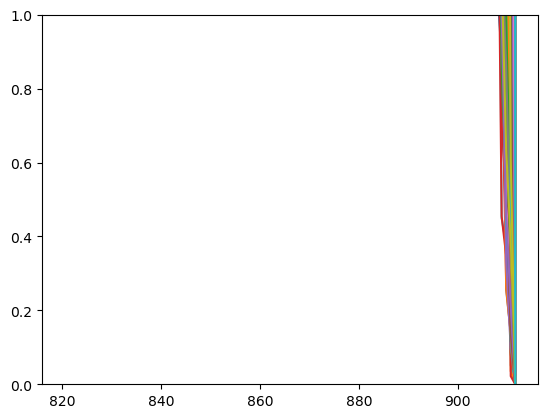

In [171]:
AA_tau1_list_Fz68=[]
for tp in tau_profiles:
    plt.plot(AAout,tp)
    AA_tau1=AAout[np.where(tp>1)[0][0]]
    AA_tau1_list_Fz68.append(AA_tau1)
    plt.ylim(0,1)
    plt.grid()

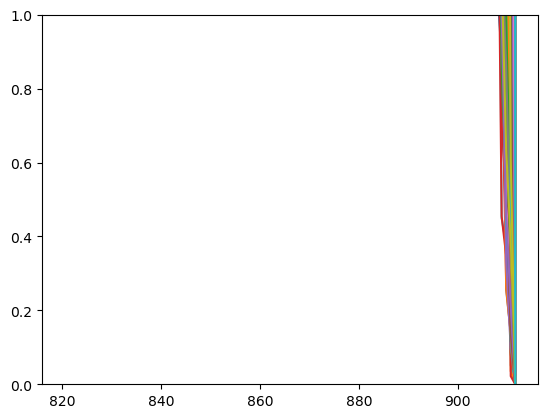

In [178]:
AA_tau1_list=[]
for tp in tau_profiles:
    plt.plot(AAout,tp)
    AA_tau1=AAout[np.where(tp>1)[0][0]]
    AA_tau1_list.append(AA_tau1)
    plt.ylim(0,1)
    plt.grid()

In [174]:
mfp_pMpc_Fz68

array([0.37564251, 0.75128502, 0.37564251, 0.75128502, 0.37564251,
       0.37564251, 0.37564251, 0.37564251, 0.75128502, 1.12692754,
       0.37564251, 1.12692754, 0.75128502, 0.37564251, 0.37564251,
       0.37564251, 0.75128502, 0.75128502, 0.37564251, 0.37564251,
       0.37564251, 0.75128502, 0.37564251, 0.75128502, 0.75128502,
       0.75128502, 0.37564251, 0.75128502, 0.37564251, 0.37564251,
       0.75128502, 0.75128502, 0.37564251, 0.37564251, 0.37564251,
       0.37564251, 0.37564251, 0.75128502, 0.37564251, 0.75128502,
       0.37564251, 0.37564251, 0.37564251, 0.        , 0.37564251,
       0.37564251, 0.37564251, 0.37564251, 0.37564251, 0.75128502,
       1.12692754, 0.37564251, 1.12692754, 0.75128502, 0.37564251,
       0.37564251, 0.75128502, 0.37564251, 0.        , 1.12692754,
       1.12692754, 0.37564251, 0.37564251, 0.75128502, 0.75128502,
       1.12692754, 1.12692754, 1.12692754, 0.37564251, 0.37564251,
       0.75128502, 0.37564251, 1.12692754, 0.        , 0.37564

8.92864687051665 8.639777778698454
6.974178879970217 6.761565218111827
1.9364371499647977 1.8782125605866264
1.2869512465139454 1.126927536351948
0.6149267923360472 0.37564251211731603


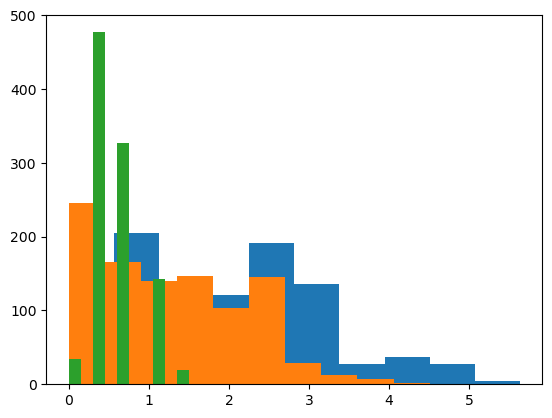

In [175]:
mfp_pMpc_z525=(eV2lambdaAA(13.6)-np.array(AA_tau1_list))/eV2lambdaAA(13.6)*clight_kmps/Hz

mfp_pMpc_Fz52=(eV2lambdaAA(13.6)-np.array(AA_tau1_list_Fz52))/eV2lambdaAA(13.6)*clight_kmps/Hz

mfp_pMpc_Fz61=(eV2lambdaAA(13.6)-np.array(AA_tau1_list_Fz61))/eV2lambdaAA(13.6)*clight_kmps/Hz
mfp_pMpc_Fz64=(eV2lambdaAA(13.6)-np.array(AA_tau1_list_Fz64))/eV2lambdaAA(13.6)*clight_kmps/Hz
mfp_pMpc_Fz68=(eV2lambdaAA(13.6)-np.array(AA_tau1_list_Fz68))/eV2lambdaAA(13.6)*clight_kmps/Hz


# plt.hist(mfp_pMpc_z525)
# plt.hist(mfp_pMpc_Fz52)
plt.hist(mfp_pMpc_Fz61)
plt.hist(mfp_pMpc_Fz64)
plt.hist(mfp_pMpc_Fz68,bins=10)
print(np.mean(mfp_pMpc_z525),np.median(mfp_pMpc_z525))
print(np.mean(mfp_pMpc_Fz52),np.median(mfp_pMpc_Fz52))
print(np.mean(mfp_pMpc_Fz61),np.median(mfp_pMpc_Fz61))
print(np.mean(mfp_pMpc_Fz64),np.median(mfp_pMpc_Fz64))
print(np.mean(mfp_pMpc_Fz68),np.median(mfp_pMpc_Fz68))

(array([ 34.,   0., 477.,   0., 327.,   0.,   0., 142.,   0.,  20.]),
 array([0.        , 0.150257  , 0.30051401, 0.45077101, 0.60102802,
        0.75128502, 0.90154203, 1.05179903, 1.20205604, 1.35231304,
        1.50257005]),
 <BarContainer object of 10 artists>)

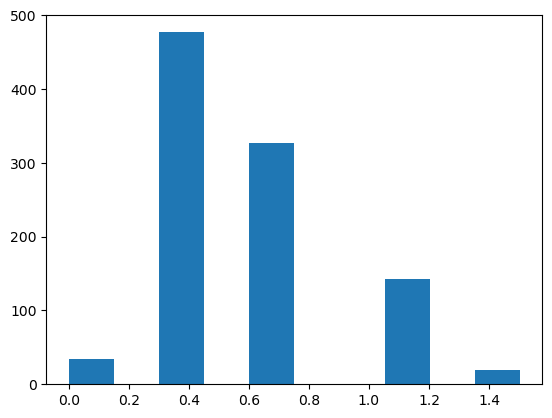

In [177]:
plt.hist(mfp_pMpc_Fz68,bins=10)

In [176]:
Hz

806.6986329653181

3.244720589908742 2.5799527616555147


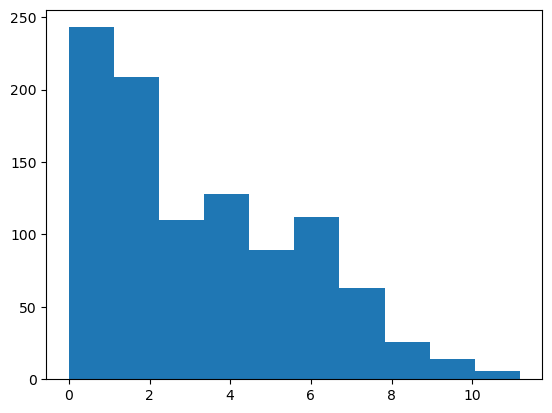

In [134]:
mfp_pMpc_z610=(eV2lambdaAA(13.6)-np.array(AA_tau1_list_z610))/eV2lambdaAA(13.6)*clight_kmps/Hz
plt.hist(mfp_pMpc_z610)
print(np.mean(mfp_pMpc_z610),np.median(mfp_pMpc_z610))

(array([243., 209., 110., 128.,  89., 112.,  63.,  26.,  14.,   6.]),
 array([ 0.        ,  1.11797953,  2.23595906,  3.35393859,  4.47191812,
         5.58989765,  6.70787718,  7.82585671,  8.94383624, 10.06181577,
        11.1797953 ]),
 <BarContainer object of 10 artists>)

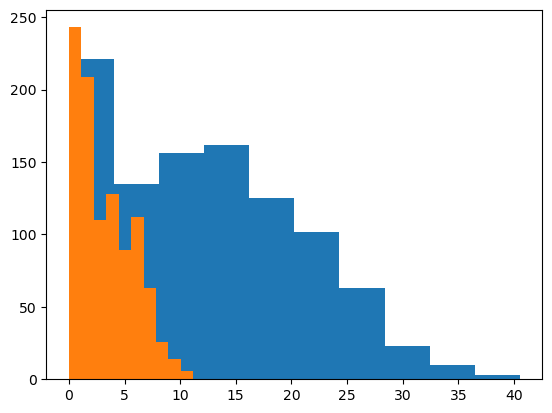

In [135]:
plt.hist(mfp_pMpc_z525,label="z=5.25")
plt.hist(mfp_pMpc_z610,label="z=6.10")

In [145]:
1/0.14-1

6.142857142857142

In [136]:
np.save("tau_profiles_C_a0.1409.npy",tau_profiles)

In [122]:
np.save("tau_profiles_C_a0.1600.npy",tau_profiles)

In [124]:
np.savetxt("tau_profile_lambdaAA.txt",tau_profiles)